### Módulo 3 | PAIR PROGRAMMING | Regresión 1 | 25/05/22 | Almudena & Lara

- Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo.
- De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables Para los ejercicios de _pair programming** de Regresión lineal I, II y Regresión Lineal múltiple I y II usaremos el **dataframe_** que se tome para el desarrollo de este ejercicio de pair programming**.
- Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicio

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# EJERCICIO 1
Buscar un conjunto de datos a analizar:
- Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
- Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. 
- Asimismo, se recomienda que los datasets esten ligeramente limpios para facilidar los análisis.




> 👩🏽‍🦱👩🏽‍🦱💬
> - Escogemos un Dataset de Kaggle que recoge información sobre películas de Marvel y DC.
> - Toda la información del dataset en este [Link](https://www.kaggle.com/datasets/jcraggy/marvel-vs-dc-imdb-rotten-tomatoes/ "Title")

In [3]:
df = pd.read_csv("mdc.csv", encoding="latin-1", index_col= 0)
df.head(2)

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1
2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,2


**Descripción de las variables del Dataset:**
 - TITLE character Categorical Nominal - name of movie
 - YEAR numeric continuous Year Release Date
 - GENRE character Categorical Nominal - mix of many IMDB & Rotten Tomatoes Genre labels
 - RUNTIME numeric continuous Length of movie in minutes
 - MPA_RATING character Categorical Ordinal - Motion Picture Association film rating system
 - IMDB_RATING numeric discrete Rating on scale 1-10 with 10th percent .1-.9
 - IMDB_VOTES numeric continuous Number of user votes
 - GROSS numeric continuous Gross Profit as a whole number
 - DIRECTOR character Categorical Nominal - top 1 director - STARS character Categorical Nominal - top 4 actor/actress
 - DESCRIPTION character Description of movie
 - CRIT_CONSENSUS character Critics Consensus (Professional) about the movie
 - TOMATO_METER numeric continuous Percentage of PROFESSIONAL critic reviews that are positive
 - TOMATO_REVIEW numeric continuous Number of PROFESSIONAL reviews count
 - TOM_AUD_SCORE numeric continuous Percentage of regular user movie score
 - TOM_RATINGS numeric continuous Number of regular user votes
 - ENTITY character Factor w/2 levels (Marvel/DC) - entity for premise of movie


> 👩🏽‍🦱👩🏽‍🦱💬
> **Tras la revisión de variables, formulamos algunas posibles hipótesis**:
> - Pelis más largas tienen más rating
> - El rating de IMDB es proporcional al de RottenTomatoes
> - Las películas nuevas duran más
> - El rating es mayor cuanto más recientes son las películas
> - Las películas que más gustan tienen más reseñas. [*] Posible regresión Hiperbólica (cuanto más/menos gusta una película, más reseñas recibe). Para ver la cantidad de reseñas podemos utilizar: imdb_votes & tom_ratings 

## EJERCICIO 2
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado. Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 90
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           90 non-null     object 
 1   year            90 non-null     int64  
 2   genre           90 non-null     object 
 3   runtime         90 non-null     int64  
 4   mpa_rating      90 non-null     object 
 5   imdb_rating     90 non-null     float64
 6   imdb_votes      90 non-null     int64  
 7   imdb_gross      90 non-null     int64  
 8   director        90 non-null     object 
 9   stars           90 non-null     object 
 10  description     90 non-null     object 
 11  crit_consensus  90 non-null     object 
 12  tomato_meter    90 non-null     int64  
 13  tomato_review   90 non-null     int64  
 14  tom_aud_score   90 non-null     int64  
 15  tom_ratings     90 non-null     int64  
 16  entity          90 non-null     object 
 17  id              90 non-null     int64

In [5]:
df.columns

Index(['title', 'year', 'genre', 'runtime', 'mpa_rating', 'imdb_rating',
       'imdb_votes', 'imdb_gross', 'director', 'stars', 'description',
       'crit_consensus', 'tomato_meter', 'tomato_review', 'tom_aud_score',
       'tom_ratings', 'entity', 'id'],
      dtype='object')

>  👩🏽‍🦱👩🏽‍🦱💬 Observamos que:
> - Las columnas no tienen nulos.
> - Tenemos 90 registros (filas)
> - El dataset original tiene 18 columnas: title', 'year', 'genre', 'runtime', 'mpa_rating',        'imdb_rating', 'imdb_votes', 'imdb_gross', 'director', 'stars', 'description',
       'crit_consensus', 'tomato_meter', 'tomato_review', 'tom_aud_score',
       'tom_ratings', 'entity', 'id'
> - Los tipos de dato de cada variable.
> - Por ejemplo, vemos que en la puntuación de cada película para IMDB se representa en floats (1-10), y para RottenTomatoes en int (%). "imbd_ratings" y "tom_aud_score" (%), respectivamente. 

# HIPÓTESIS Y VARIABLES:
Nos decantamos por esta HIPÓTESIS:
- H1: "Cuanto más largas son las películas mejor puntuación reciben"
- H0: "El tiempo de duración las películas no afecta a su puntuación"

**VARIABLES**

- DEPENDIENTE: Nota en IMDB --> imdb_rating
- INDEPENDIENTE: Duración de la película --> runtime

## EDA DE LAS VARIABLES

**1) IMDB_rating**

In [6]:
df["imdb_rating"].describe()

count    90.000000
mean      6.552222
std       1.271576
min       2.900000
25%       5.700000
50%       6.900000
75%       7.400000
max       9.000000
Name: imdb_rating, dtype: float64

In [7]:
plt.figure(figsize =(8,4))
fig = sns.pairplot(data = df_penguin, hue='species')

NameError: name 'df_penguin' is not defined

<Figure size 576x288 with 0 Axes>

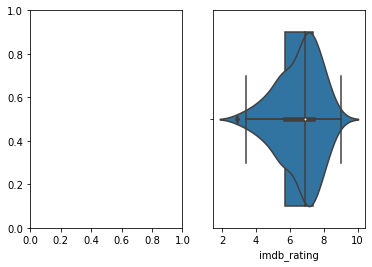

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0] = sns.violinplot(data = df, x = "imdb_rating")
ax[1] = sns.boxplot(data = df, x = "imdb_rating")

plt.show()

In [ ]:
#Curioseamos qué películas tienen el máximo / mínimo rating:
df[df["imdb_rating"] == df["imdb_rating"].max()]

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
76,The Dark Knight,2008,"Action, Crime, Drama",152,PG-13,9.0,2369304,534860000,Christopher Nolan,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",When the menace known as the Joker wreaks havo...,"Dark, complex, and unforgettable, The Dark Kni...",94,344,94,250000,DC,76


In [ ]:
df[df["imdb_rating"] == df["imdb_rating"].min()]

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
71,Steel,1997,"Action, Adventure, Crime",97,PG-13,2.9,11519,1710000,Kenneth Johnson,"Shaquille O'Neal,Annabeth Gish,Judd Nelson,Ric...",A scientist for the military turns himself int...,Steel is a badly-acted movie that indulges not...,12,26,15,5000,DC,71


2. Runtime

In [ ]:
df["runtime"].describe()

count     90.000000
mean     124.144444
std       23.522192
min       58.000000
25%      110.500000
50%      124.000000
75%      136.000000
max      244.000000
Name: runtime, dtype: float64

In [ ]:
df[df["runtime"]== df["runtime"].min()]

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
58,Superman and the Mole-Men,1951,"Action, Adventure, Drama",58,Passed,5.7,1828,0,Lee Sholem,"George Reeves,Phyllis Coates,Jeff Corey,Walter...",When underground beings explore the surface wo...,"Even at under an hour, this children's fantasy...",0,2,83,250,DC,58


In [ ]:
df[df["runtime"]== df["runtime"].max()]

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1


TypeError: cannot unpack non-iterable AxesSubplot object

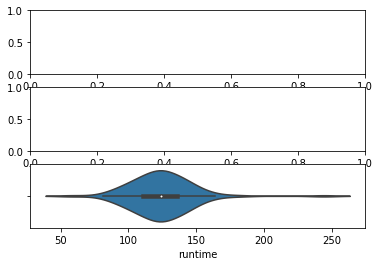

In [ ]:
fig, ax = plt.subplots(3, 1)
fig, ax[0] = sns.violinplot(data = df, x = "runtime")
fig, ax[1] = sns.boxplot(data = df, x = "runtime")
sns.swarmplot(data = df, x = "runtime")
plt.show()


# EJERCICIO 3
Realiza el ajuste lineal simple utilizando diversas métricas y realiza una gráfica mostrando los resultados.


In [30]:
#Variable independiente (predictora)
ind = df["runtime"].values.reshape(-1, 1)

#Variable dependiente:
dep = df["imdb_rating"].values.reshape(-1, 1)

# Le hacemos un reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.

In [31]:
#Usamos "train_test_split" para dividir de forma aleatoria nuestros datos, para las dos variables, en un grupo aleatorio con el 70 % de los datos, dirigido al entrenamiento, y un 30 % de ellos para el test posterior.

ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size = 0.3)

In [32]:
#Inicializamos el método "LinearRegression" y lo aplicamos (.fit) a nuestros conjuntos de datos de datos de entrenamiento.
LR = LinearRegression(n_jobs=-1)
LR.fit(ind_train, dep_train)

LinearRegression(n_jobs=-1)

In [34]:
#Creamos unas variables que guardarán un conjunto de datos predichos para la variable dependiente (aplicando el método LR - que hemos aplicado antes con .fit a ambos conjuntos - a ind_train, la variable predictora. 

dep_predict_train = LR.predict(ind_train)
dep_prediction = LR.predict(ind_test)

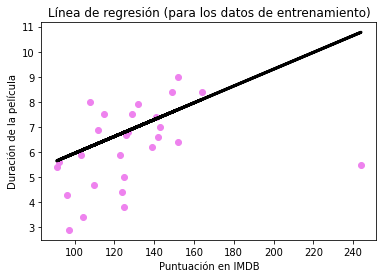

In [36]:
#Realizamos un scatterplot con los datos, reales, que hemos guardado en las dos variables test - con un 30 % aleatorio de los datos.
# Sobre la misma figura, planteamos la recta de regresión que hemos creado con la prediccion (dep_prediction):

plt.scatter(ind_test,dep_test,color="violet")  
plt.plot(ind_test, dep_prediction,color="black",linewidth=3) 
plt.title('Línea de regresión (para los datos de entrenamiento)')
plt.xlabel('Puntuación en IMDB')
plt.ylabel('Duración de la película')
plt.show()

# EJERCICIO 4
Interpretación de los resultados. Ahora interpreta los resultados obtenidos del ajuste lineal simple y explica lo mejor posible la naturaleza de los mismos.

> 👩🏽‍🦱👩🏽‍🦱💬
> - A primera vista, no parece que la predicción esté del todo ajustada a los datos del test. 
> - Habrá que calcular el grado de error que podemos permitir y hacer más estudios para ver si existe, o no, una relación entre estas dos variables.